# Analisis exploratorio de datos y preparación  de los datos (EDA y ETL)
**Proyecto:** E-commerce Petshop Huellitas

**Fuente de Datos:** Amazon Pet Supplies Dataset

Este notebook documenta el proceso de transformación  de datos crudos en un catálogo  de productos estructurado y limpio.

**Metodologia aplicada**

**Data cleaning**: imputacion en valores nulos de precios y eliminacion de registros duplicados.

**Feature engineering**: creacion de nuevas categoria y recategorizacion de productos basandome  en la columna title y breadcrumbs
**Traducción**: uso de api de google translator.

**OUTPUT**: generacion de sentencias insert para la tabla producto de la  base de datos- Neon, PostgreSQL.

Importo librerias

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Carga del dataset

In [3]:

dataset='amazon_pet_supplies_dataset_sample[1].csv'
df=pd.read_csv(dataset)

Informacion general

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             343 non-null    object
 1   asin            343 non-null    object
 2   title           343 non-null    object
 3   price           284 non-null    object
 4   currency        284 non-null    object
 5   brand           343 non-null    object
 6   images          343 non-null    object
 7   overview        343 non-null    object
 8   about_item      322 non-null    object
 9   availability    252 non-null    object
 10  description     308 non-null    object
 11  specifications  340 non-null    object
 12  breadcrumbs     343 non-null    object
 13  uniq_id         343 non-null    object
 14  scraped_at      343 non-null    object
dtypes: object(15)
memory usage: 40.3+ KB


Se puede apreciar que tengo numerosos valores nulos y que todas las columnas son del tipo object, es decir, tengo cadena de caracteres. Esto imposibilita realizar calculos.

Paneo general de registros

In [5]:
df.head()

,url,asin,title,price,currency,brand,images,overview,about_item,availability,description,specifications,breadcrumbs,uniq_id,scraped_at
0,https://www.amazon.in/dp/B0796LTTT6,B0796LTTT6,Retractable Cat Wand (Orange),"4,066.00",INR,Brand: Retractable,https://m.media-amazon.com/images/I/51VTS7FvDR...,[],NaN,Usually dispatched in 6 to 10 days.,Retractable Cat Wand (Orange),"[{'Manufacturer': '\u200eRetractable'}, {'Coun...",Pet Supplies | Cats | Toys | Feather Toys,380bad09-297f-59c4-8f58-0db9e98f9360,2022-07-25
1,https://www.amazon.in/dp/B01LMH18YQ,B01LMH18YQ,"Avianweb Arm & Hand Perch (X-Large (1.5"" dowel))",NaN,NaN,Brand: Avianweb,https://m.media-amazon.com/images/I/41tkMFbAxU...,[],Protects against bites & scratches: Birds have...,NaN,NaN,"[{'Manufacturer': '\u200eAvianweb LLC'}, {'Ite...",Pet Supplies | Birds | Birdcage Accessories | ...,8d3a5b16-733e-5f8f-97b5-8c23a176d568,2022-07-23
2,https://www.amazon.in/dp/B08JVLQS4P,B08JVLQS4P,Backyard Barnyard Chicken Swing Toy for Coop (...,199.00,INR,Brand: Backyard Barnyard,https://m.media-amazon.com/images/I/412neI904z...,[],🐔 GREAT ADDITION TO ANY COOP OR PEN - Poultry ...,NaN,Backyard Barnyard Chicken Swing Toy for Coop (...,"[{'Manufacturer': '\u200eBackyard Barnyard'}, ...",Pet Supplies | Birds | Toys,f8650333-e544-5609-bcea-89999d43b4c6,2022-07-24
3,https://www.amazon.in/dp/B002DZI4F8,B002DZI4F8,Prevue Pet Products BPV1155 Bamboo Covered Bre...,NaN,NaN,Brand: Prevue,https://m.media-amazon.com/images/I/51mxIXlOWc...,[],"5 1/2"" diam. x 6"" H | Perfect for small birds ...",NaN,Prevue Pet covered nest hut for breeding purpo...,"[{'Manufacturer': '\u200eTopDawg Pet Supply'},...",Pet Supplies | Birds | Birdcage Accessories | ...,774fc39c-8927-54e9-97c4-ff52d32072e8,2022-07-23
4,https://www.amazon.in/dp/B09P8RX26L,B09P8RX26L,CuddlyPet Hammock for Dogs,850.00,INR,Brand: Generic,https://m.media-amazon.com/images/I/41qXzfsNrC...,[],Comfortable and Soft,Only 2 left in stock.,"[ Powerful Functions ]: Even at home, you can ...","[{'Manufacturer': '\u200eCuddlyPet'}, {'Countr...",Pet Supplies | Cats | Grooming | Claw Care,ed032b13-69bf-5fbe-b07e-e13895ac57be,2022-07-25


Descripcion de variables

*   url[URL]: enlace al producto
*   asin: significa AmazonStandard Identification Number. Es un codigo alfanumerico que identifica los productos en amazon.


*  title[Titulo]: nombre de producto

*   uniq_id [ID]: propio de su base

*  price [Precio]: costo del producto
*   currency: [Moneda]:
tipo de moneda (USD,ARS,EUR)


*  availability [Stock]: cantidad de unidades disponibles


*  brand[Marca]: marca del fabricante


*   overview: resumen de puntos destacados
*   about item: info adicional o caracteristicas claves

*   descripcion: descripcion del producto
*   specifications: datos tecnicos

*   images: url de la foto del producto
*   breadcrumbs : categoria jerarquica


*   scraped_at: fecha y hora de captura de informacion
















Duplicados


In [6]:
#Creo una copia por seguridad y posterior comparacion
df_limpio=df.copy()

In [7]:
# veo cuantos duplicados tengo inicialmente
print("Cantidad de duplicados:",df_limpio.duplicated().sum())

Cantidad de duplicados: 0


In [8]:
print(f"Tamaño actual del dataset: {df_limpio.shape}")

Tamaño actual del dataset: (343, 15)



# Features

# **PRODUCTOS**

Plan Mapeo:


En mi tabla productos

*   nombre=title
*   precio=price
*   img=images
* stockActual=availability







# Precio


In [9]:
df_productos =df_limpio
#Estado inicial
print(df_productos['price'].head())

0    4,066.00
1         NaN
2      199.00
3         NaN
4      850.00
Name: price, dtype: object


In [10]:
#Elimino simbolos, letras al texto
df_productos['precio'] = df_productos['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)

In [11]:
#Convierto a decimal
df_productos['precio'] = pd.to_numeric(df_productos['precio'], errors='coerce')

In [12]:
#Verifico
print(df_productos['precio'].describe())

count      284.000000
mean      1884.556725
std       3347.995882
min        135.000000
25%        399.000000
50%        969.000000
75%       1843.750000
max      28638.000000
Name: precio, dtype: float64


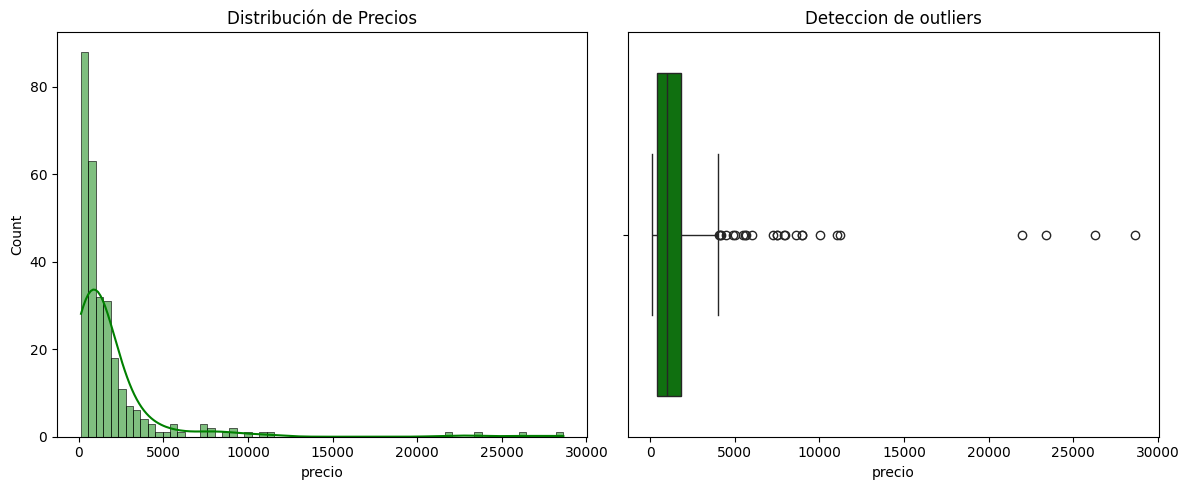

In [13]:
#Distribucion
plt.figure(figsize=(12, 5))
#Histograma -grafico 1
plt.subplot(1, 2, 1)
sns.histplot(df_productos['precio'], kde=True, color='green')
plt.title('Distribución de Precios')

#Boxplot - grafico 2
plt.subplot(1, 2, 2)
sns.boxplot(x=df_productos['precio'], color='green')
plt.title('Deteccion de outliers')
plt.tight_layout()


plt.show()


Se observa una distribucion sesgada hacia la derecha (asimetria positiva). Ambos graficos revelam la presencia de multiples valores atipicos significativos en el rango superior.

**Imputacion de valores nulos en el campo precio**



Se decide imputar los valores nulos por la mediana ya que conserva mejor la tendencia central de los datos y evita sesgos adicionales en comparacion de la media que esta inflada por los valores atipicos.



In [14]:
mediana= df_productos['precio'].median()
df_productos['precio']=df_productos['precio'].fillna(mediana)

In [15]:
#verificacion
df_productos['precio'].isnull().sum()

np.int64(0)

In [16]:
import random

In [17]:

def asignarPrecioLogico(fila):
    # Convertimos el nombre a minúscula para buscar fácil
    nombre = str(fila['title']).lower()

    if any(x in nombre for x in ['cama', 'transportadora', 'casa', 'jaula']):
        return random.randint(40000, 95000)
    elif any(x in nombre for x in ['comedero', 'alimento', 'shampoo', 'cuidado']):
        return random.randint(15000, 35000)
    elif any(x in nombre for x in ['juguete', 'snack', 'correa', 'collar', 'accesorio']):
        return random.randint(3500, 12500)
    else:
        return random.randint(5000, 20000)

df_productos['precio'] = df_productos.apply(asignarPrecioLogico, axis=1)

display(df_productos[['title', 'precio']].head(10))

,title,precio
0,Retractable Cat Wand (Orange),15904
1,"Avianweb Arm & Hand Perch (X-Large (1.5"" dowel))",17604
2,Backyard Barnyard Chicken Swing Toy for Coop (...,17391
3,Prevue Pet Products BPV1155 Bamboo Covered Bre...,15079
4,CuddlyPet Hammock for Dogs,6358
5,Noodoky Pet Stroller for Cats Dogs Rabbit with...,19345
6,"Ubersweet® Gold, 25X14X16Cm: Three Levels Towe...",13157
7,PetNest CR-1 Quality Safest Round Organic Bird...,18450
8,Yellow Dog Design Easter Dogs Coupler Dog Leas...,8028
9,DIYthinker One Gesture Outline Pattern Pet Tag...,12223


# StockActual

El stock actual va a usar datos del campo availability pero como tiene datos sucios uso el siguiente criterio:


*  si esta en stock el producto se va a llenar con un numero aleatoorio entre 3 y 50
*   si no hay datos o agotado 0



In [18]:
# Defino una funcion para generar stock realista
def calculoStock(texto):
  if pd.isna(texto):
    return 0
  if "stock" in texto.lower():
    return random.randint(3,50)
  else:
    return 0

In [19]:
#Creo la columa stockActual y uso la funcion definida previamente
df_productos['stockActual']=df_productos['availability'].apply(calculoStock)

In [20]:
if 'stockActual' not in df_productos.columns:
    df_productos['stockActual']=df_productos['availability'].apply(calculoStock)

df_productos[['availability','stockActual']].head(10)

,availability,stockActual
0,Usually dispatched in 6 to 10 days.,0
1,NaN,0
2,NaN,0
3,NaN,0
4,Only 2 left in stock.,6
5,NaN,0
6,Usually dispatched in 2 to 3 weeks.,0
7,In stock.,7
8,Usually dispatched in 6 to 10 days.,0
9,In stock.,22


# StockMinimo

En mi caso el stock minimo asigno un umbral minimo para alertar antes de quedarse en 0


In [21]:
df_productos['stockMinimo'] = 5

# img

In [22]:
df_productos[['images']].head()

,images
0,https://m.media-amazon.com/images/I/51VTS7FvDR...
1,https://m.media-amazon.com/images/I/41tkMFbAxU...
2,https://m.media-amazon.com/images/I/412neI904z...
3,https://m.media-amazon.com/images/I/51mxIXlOWc...
4,https://m.media-amazon.com/images/I/41qXzfsNrC...


In [23]:
df_productos['img'] = df_productos['images'].astype(str).str.split('~').str[0]

In [24]:
df_productos[['images', 'img']].head()


,images,img
0,https://m.media-amazon.com/images/I/51VTS7FvDR...,https://m.media-amazon.com/images/I/51VTS7FvDR...
1,https://m.media-amazon.com/images/I/41tkMFbAxU...,https://m.media-amazon.com/images/I/41tkMFbAxU...
2,https://m.media-amazon.com/images/I/412neI904z...,https://m.media-amazon.com/images/I/412neI904z...
3,https://m.media-amazon.com/images/I/51mxIXlOWc...,https://m.media-amazon.com/images/I/51mxIXlOWc...
4,https://m.media-amazon.com/images/I/41qXzfsNrC...,https://m.media-amazon.com/images/I/41qXzfsNrC...


Limpieza de tipos de animales no deseados previo a categorizar


In [25]:

# solo dejamos loros gatos y perros.
prohibidas = [
    'frog', 'rana', 'toad', 'reptile', 'turtle', 'lizard', 'snake', 'gecko',
    'hamster', 'hámster', 'gerbil', 'guinea pig', 'rat', 'mouse', 'mice', 'rodent', 'roedor', 'rabbit', 'conejo',
    'coop', 'gallinero', 'poultry', 'chicken swing', 'hen', 'rooster', 'gallina', 'gallo', 'farm',
    'cow', 'vaca', 'cattle', 'calf', 'horse', 'caballo'
]
#funcion para borrar los registros que contengas las palabras de la lista
def debeBorrarse(texto):
    text=str(texto).lower()
    for p in prohibidas:
      if p in text:
        # se excluyen los que menccionen alimentos
        if "flavor" in text or "taste" in text : return False
        return True
    return False
#inicialmente
cantInicial=len(df_productos)
print("Cant inicial:",cantInicial)
#se crea una columna temporal para buscar entre breadcrumbs y title
df_productos['temp']=df_productos['title'].astype(str)+" "+df_productos['breadcrumbs'].astype(str)
#aplicamos filtro
df_limpio=df_productos[~df_productos['temp'].apply(debeBorrarse)].copy()
#acomoda ids
df_limpio.reset_index(drop=True, inplace=True)
#muestro resultados
print("Se eliminaron " ,cantInicial-len(df_limpio),"registros")
print("Cant final:",len(df_limpio))

Cant inicial: 343
Se eliminaron  97 registros
Cant final: 246


# idCategoria

In [26]:
#Recategorizacion
def clasificarCategoria(texto):
  text= str(texto).lower()
  #farmacia
  if any(x in text for x in ['medic', 'health', 'vitamin', 'flea', 'tick', 'worm', 'care', 'dental', 'recovery', 'collar e']): return 1
  #higiene
  if any(x in text  for x in ['litter', 'scoop', 'poop', 'waste', 'tray', 'pan', 'toilet', 'shampoo', 'groom', 'brush', 'towel', 'wipe', 'pad', 'diaper']): return 2
  #alimento
  if any(x in text for x in ['food', 'treat', 'snack', 'biscuit', 'nutrition', 'feed', 'bowl', 'dish', 'waterer']): return 3
  #juguetes
  if any(x in text for x in ['toy', 'game', 'ball', 'chew', 'scratch', 'teaser', 'wand', 'tunnel']): return 4
  #cama/hogar
  if any(x in text for x in ['bed', 'mat', 'blanket', 'hammock', 'crate', 'kennel', 'house', 'cave', 'carrier']) : return 5
  #ropa/paseo
  if any(x in text for x in ['leash', 'harness', 'apparel', 'shirt', 'coat', 'sweater', 'costume', 'vest', 'collar']): return 6
  #accesorios
  return 7


In [27]:
# le aplico a la columna breadcrumbs la funcion creada previamente para que clasifique los productos
df_limpio['idCategoria'] = df_limpio['breadcrumbs'].apply(clasificarCategoria)

#verificacion
print("\nConteo de productos por categ:")
print(df_limpio['idCategoria'].value_counts().sort_index())

# una muestra para confirmar
display(df_limpio[['breadcrumbs', 'idCategoria']].head(10))



Conteo de productos por categ:
idCategoria
1    12
2    16
3    45
4    65
5    31
6    34
7    43
Name: count, dtype: int64


,breadcrumbs,idCategoria
0,Pet Supplies | Cats | Toys | Feather Toys,4
1,Pet Supplies | Birds | Birdcage Accessories | ...,7
2,Pet Supplies | Birds | Birdcage Accessories | ...,7
3,Pet Supplies | Cats | Grooming | Claw Care,1
4,Pet Supplies | Cats | Toys | Interactive Toys,4
5,Pet Supplies | Birds | Birdcage Accessories | ...,7
6,"Pet Supplies | Cats | Collars, Harnesses & Lea...",6
7,"Pet Supplies | Cats | Collars, Harnesses & Lea...",6
8,Pet Supplies | Birds | Toys,4
9,Pet Supplies | Cats | Beds & Furniture | Beddi...,5


Visualizacion

In [28]:
# Mostramos información de las columnas y una muestra de los datos
print("LISTA DE CAMPOS ACTUALES:")
print(df_limpio.columns.tolist())

print("\n MUESTRA DE DATOS (Primeras 3 filas):")
pd.set_option('display.max_columns', None) # Esto fuerza a que muestre TODAS las columnas sin esconder ninguna
display(df_limpio.head(3))

LISTA DE CAMPOS ACTUALES:
['url', 'asin', 'title', 'price', 'currency', 'brand', 'images', 'overview', 'about_item', 'availability', 'description', 'specifications', 'breadcrumbs', 'uniq_id', 'scraped_at', 'precio', 'stockActual', 'stockMinimo', 'img', 'temp', 'idCategoria']

 MUESTRA DE DATOS (Primeras 3 filas):


,url,asin,title,price,currency,brand,images,overview,about_item,availability,description,specifications,breadcrumbs,uniq_id,scraped_at,precio,stockActual,stockMinimo,img,temp,idCategoria
0,https://www.amazon.in/dp/B0796LTTT6,B0796LTTT6,Retractable Cat Wand (Orange),"4,066.00",INR,Brand: Retractable,https://m.media-amazon.com/images/I/51VTS7FvDR...,[],NaN,Usually dispatched in 6 to 10 days.,Retractable Cat Wand (Orange),"[{'Manufacturer': '\u200eRetractable'}, {'Coun...",Pet Supplies | Cats | Toys | Feather Toys,380bad09-297f-59c4-8f58-0db9e98f9360,2022-07-25,15904,0,5,https://m.media-amazon.com/images/I/51VTS7FvDR...,Retractable Cat Wand (Orange) Pet Supplies | C...,4
1,https://www.amazon.in/dp/B01LMH18YQ,B01LMH18YQ,"Avianweb Arm & Hand Perch (X-Large (1.5"" dowel))",NaN,NaN,Brand: Avianweb,https://m.media-amazon.com/images/I/41tkMFbAxU...,[],Protects against bites & scratches: Birds have...,NaN,NaN,"[{'Manufacturer': '\u200eAvianweb LLC'}, {'Ite...",Pet Supplies | Birds | Birdcage Accessories | ...,8d3a5b16-733e-5f8f-97b5-8c23a176d568,2022-07-23,17604,0,5,https://m.media-amazon.com/images/I/41tkMFbAxU...,"Avianweb Arm & Hand Perch (X-Large (1.5"" dowel...",7
2,https://www.amazon.in/dp/B002DZI4F8,B002DZI4F8,Prevue Pet Products BPV1155 Bamboo Covered Bre...,NaN,NaN,Brand: Prevue,https://m.media-amazon.com/images/I/51mxIXlOWc...,[],"5 1/2"" diam. x 6"" H | Perfect for small birds ...",NaN,Prevue Pet covered nest hut for breeding purpo...,"[{'Manufacturer': '\u200eTopDawg Pet Supply'},...",Pet Supplies | Birds | Birdcage Accessories | ...,774fc39c-8927-54e9-97c4-ff52d32072e8,2022-07-23,15079,0,5,https://m.media-amazon.com/images/I/51mxIXlOWc...,Prevue Pet Products BPV1155 Bamboo Covered Bre...,7


/tmp/ipython-input-145547275.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_limpio, x='idCategoria', palette='viridis')


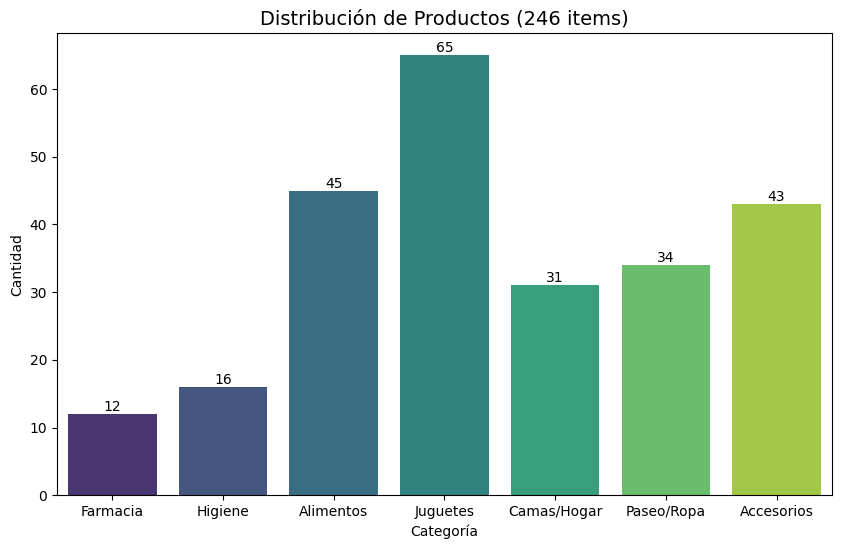

In [29]:
#Grafico de barras
plt.figure(figsize=(10, 6))


nombres = {
    1: 'Farmacia',
    2: 'Higiene',
    3: 'Alimentos',
    4: 'Juguetes',
    5: 'Camas/Hogar',
    6: 'Paseo/Ropa',
    7: 'Accesorios'
}

#
ax = sns.countplot(data=df_limpio, x='idCategoria', palette='viridis')

plt.title(f'Distribución de Productos ({len(df_limpio)} items)', fontsize=14)
plt.xlabel('Categoría')
plt.ylabel('Cantidad')

# 3. Ponemos los nombres en el eje X
# Buscamos qué números de categoría existen en tu tabla
categorias_existentes = sorted(df_limpio['idCategoria'].unique())
# Creamos la lista de etiquetas
etiquetas = [nombres.get(i, str(i)) for i in categorias_existentes]
plt.xticks(ticks=range(len(categorias_existentes)), labels=etiquetas)

# Ponemos el número arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()



# nombre

Solo traducimos la columna title y lo acortamos a 100 caracteres.

In [30]:

!pip install deep-translator

from deep_translator import GoogleTranslator

In [40]:
# 1. Instalamos libreria (si hace falta)
!pip install -q deep-translator

from deep_translator import GoogleTranslator
import pandas as pd

# Configuración
translator = GoogleTranslator(source='auto', target='es')

print(f" Iniciando traducción de {len(df_limpio)} títulos...")
print("   (Esto puede tardar unos minutos, procesando de a uno...)")

def traducir_limpio(texto):
    if pd.isna(texto) or str(texto).strip() == "":
        return "Producto Sin Nombre"

    try:

        traducido = translator.translate(str(texto)[:500])

        #Sacar comillas simples y dobles
        limpio = traducido.replace("'", "").replace('"', "")

        #Para que entre en la base de datos 100 caracteres
        return limpio[:100]

    except Exception as e:
        # Si falla devolvemos el original limpio
        print(f"Error traduciendo: {texto[:20]}... -> {e}")
        return str(texto).replace("'", "").replace('"', "")[:100]

#Aplicamos a df_limpio

df_limpio['nombre_final'] = df_limpio['title'].apply(traducir_limpio)

#verificacion
print("\n ¡Traducción terminada!")
display(df_limpio[['title', 'nombre_final']].head(10))

 Iniciando traducción de 246 títulos...
   (Esto puede tardar unos minutos, procesando de a uno...)

 ¡Traducción terminada!


,title,nombre_final
0,Retractable Cat Wand (Orange),Varita retráctil para gatos (naranja)
1,"Avianweb Arm & Hand Perch (X-Large (1.5"" dowel))",Percha para brazo y mano Avianweb (extragrande...
2,Prevue Pet Products BPV1155 Bamboo Covered Bre...,Prevue Pet Products BPV1155 Cabaña nido de crí...
3,CuddlyPet Hammock for Dogs,Hamaca para perros CuddlyPet
4,"Ubersweet® Gold, 25X14X16Cm: Three Levels Towe...","Ubersweet® Oro, 25X14X16Cm: Tres Niveles Torre..."
5,PetNest CR-1 Quality Safest Round Organic Bird...,PetNest CR-1 Casa Nido de Pájaros Orgánico Red...
6,Yellow Dog Design Easter Dogs Coupler Dog Leas...,Correa para perro con diseño de perro amarillo...
7,DIYthinker One Gesture Outline Pattern Pet Tag...,DIYthinker Un gesto contorno patrón mascota et...
8,"Bird Chewing Swing Toys Set, Natural Applewood...",Juego de juguetes para columpio para masticar ...
9,"GlobalNiche® Wine Red, 58X45Cm: Dog House Cand...","GlobalNiche® Vino Rojo, 58X45Cm: Casa para Per..."


# descripcion

In [32]:

translator = GoogleTranslator(source='auto', target='es')


def traducir_descripcion_row(row):
    # Recuperamos el texto original
    texto_original = row['description']

    # si esta vacio uso nombre
    if pd.isna(texto_original) or str(texto_original).strip() == "":
        return str(row['nombre_final']) + " - Calidad asegurada para tu mascota."

    try:
        # Limitamos caracteres para enviar al traductor
        texto_a_enviar = str(texto_original)[:400]
        traducido = translator.translate(texto_a_enviar)

        # Limpiamos comillas
        limpio = traducido.replace("'", "").replace('"', "")

        # Cortamos para ajustar a la base de datos (250 caracteres)
        return limpio[:250]

    except:
        # En caso de error, devolvemos el original limpio
        return str(texto_original).replace("'", "").replace('"', "")[:250]

# Aplicamos la traduccion y creamos la columna nueva
df_limpio['desc_final'] = df_limpio.apply(traducir_descripcion_row, axis=1)

print("Proceso finalizado. Muestra de los resultados:")
# Mostramos original vs traducido para verificar
display(df_limpio[['description', 'desc_final']].head())

Proceso finalizado. Muestra de los resultados:


,description,desc_final
0,Retractable Cat Wand (Orange),Varita retráctil para gatos (naranja)
1,NaN,Percha para brazo y mano Avianweb (extragrande...
2,Prevue Pet covered nest hut for breeding purpo...,Prevue Caseta nido cubierta para mascotas con ...
3,"[ Powerful Functions ]: Even at home, you can ...","[Funciones poderosas]: Incluso en casa, puede ..."
4,"Ubersweet Gold, 25X14X16Cm: Three Levels Tower...","Ubersweet Gold, 25X14X16Cm: Tres Niveles Torre..."


# Limpieza y traduccion

In [34]:
columnas_finales = [
    'nombre_final',
    'desc_final',
    'precio',
    'stockActual',
    'stockMinimo',
    'img',
    'idCategoria'
]
productos= df_limpio[columnas_finales].copy()


In [35]:
productos.head()

,nombre_final,desc_final,precio,stockActual,stockMinimo,img,idCategoria
0,Varita retráctil para gatos (naranja),Varita retráctil para gatos (naranja),15904,0,5,https://m.media-amazon.com/images/I/51VTS7FvDR...,4
1,Percha para brazo y mano Avianweb (extragrande...,Percha para brazo y mano Avianweb (extragrande...,17604,0,5,https://m.media-amazon.com/images/I/41tkMFbAxU...,7
2,Prevue Pet Products BPV1155 Cabaña nido de crí...,Prevue Caseta nido cubierta para mascotas con ...,15079,0,5,https://m.media-amazon.com/images/I/51mxIXlOWc...,7
3,Hamaca para perros CuddlyPet,"[Funciones poderosas]: Incluso en casa, puede ...",6358,6,5,https://m.media-amazon.com/images/I/41qXzfsNrC...,1
4,"Ubersweet® Oro, 25X14X16Cm: Tres Niveles Torre...","Ubersweet Gold, 25X14X16Cm: Tres Niveles Torre...",13157,0,5,https://m.media-amazon.com/images/I/41szQK1eFP...,4


load

In [39]:
#fase load
#funcion para escapar de las comillas
def escapar_comillas(valor):
    if pd.isna(valor): return "NULL"
    return str(valor).replace("'", "''")

nombre_archivo = 'insertar_productos_postgres_final.sql'

print(f"Generando {nombre_archivo} adaptado a tabla 'producto'...")

with open(nombre_archivo, 'w', encoding='utf-8') as f:

    f.write("-- SCRIPT PET SHOP HUELLITAS --\n")

    # tabla producto
    f.write("-- Carga de Productos --\n")

    for i, row in productos.iterrows():
        nombre = escapar_comillas(row['nombre_final'])
        desc   = escapar_comillas(row['desc_final'])
        img    = escapar_comillas(row['img'])
        precio = row['precio']
        stock  = row['stockActual']
        stock_min = row['stockMinimo']
        cat    = row['idCategoria']

        sql = f'INSERT INTO producto (nombre, descripcion, precio, img, "stockActual", "stockMinimo", "idCategoria") VALUES (\'{nombre}\', \'{desc}\', {precio}, \'{img}\', {stock}, {stock_min}, {cat});\n'

        f.write(sql)


# descarga
try:
    from google.colab import files
    files.download(nombre_archivo)
except ImportError:
    pass

Generando insertar_productos_postgres_final.sql adaptado a tabla 'producto'...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion

Se completo el proceso ETL de datos para el proyecto petshophuellitas.Se aplicaron las siguientes fases

1. Procesamiento de datos: se partio de un conjunto de datos crudos en formato csv realizando tareas de limpieza, manejo de valores nulos, verificacion de duplicados y traduccion de campos de ingles a espaniol
2. Transformacion y normalizacion Se ajustaron los tipos de datos, se generaron precios simulados y se asignaron categorias relacionales (1 a 7) para asegurar la integridad referencial
3. Generacion de Scripts: Se automatizo la creacion de sentencias SQL INSERT adaptadas a la sintaxis de PostgreSQL, manejando correctamente caracteres especiales y restricciones de clave foranea
4. Despliegue y Refinamiento: Tras la insercion masiva en la base de datos Neon (PostgreSQL), se realizaron ajustes finales mediante consultas directas para crear la categoría "Aves", reasignar productos pertinentes y eliminar registros inconsistentes, resultando en una base de datos poblada, limpia y operativa.




